# Tarea 3. ANÁLISIS EXPLORATORIO DE DATOS (EDA), LIMPIEZA, NORMALIZACIÓN Y CONSULTA BIBLIOGRÁFICA

Nombre: Patrick Zamora 

# Objetivo de la tarea
Aplicar técnicas de análisis exploratorio de datos (EDA), limpieza, manejo de valores faltantes, transformación y normalización utilizando Python para comprender la estructura del dataset Accumulación de cuentas 2008–2023.

# INTRODUCCION
# El proceso inicia con la inspección inicial del dataset, que incluye:

- Uso de funciones como df.head(), df.tail(), df.info() y df.describe().

- Revisión de tipos de datos y detección de posibles inconsistencias.

- La etapa de limpieza de datos contempla:

- Detección de valores nulos mediante df.isnull().sum().

# Propuesta de tratamiento: eliminación, imputación o transformación.

- Identificación de duplicados con df.duplicated().

- Corrección de tipos de datos (fechas, numéricos y categóricos).

# Posteriormente, se aplica normalización o estandarización para llevar las variables a escalas comparables, empleando métodos como:

- MinMaxScaler

- StandardScaler

- Comparación del efecto de cada método en una o dos variables.

# El EDA utiliza diversas visualizaciones que permiten interpretar y comunicar los resultados, entre ellas:

- Histogramas

- Boxplots

- Scatterplots

- Heatmaps de correlación

- Otras como pairplots o violin plots

* Gracias a estas técnicas, es posible obtener una comprensión profunda del dataset, apoyar la toma de decisiones y preparar los datos para etapas posteriores como el modelado estadístico o el aprendizaje automático.

## Ejemplo Practico

In [2]:
#Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import numpy as np

In [3]:
#Extracción del dataset
print("\nCExtraccion de Datos\n")

df = pd.read_csv(r"C:\Users\HP\Downloads\accumulation-accounts-2008-2023-provisional.csv")

print("\nDatos extraídos correctamente de la fuente.\n")
print(df.head())


CExtraccion de Datos


Datos extraídos correctamente de la fuente.

    Period                         Inst_sector  Inst_sector_code  \
0  2007.03  Non-corporate business enterprises               121   
1  2007.03  Non-corporate business enterprises               121   
2  2007.03  Non-corporate business enterprises               121   
3  2007.03  Non-corporate business enterprises               121   
4  2007.03  Non-corporate business enterprises               121   

                                          Descriptor SNA08TRANS  \
0                                   ISA Saving (net)    B08N000   
1  Statistical discrepancy - net lending (+) / ne...    B090000   
2     Total net transactions in non-financial assets    B091N00   
3  Capital Account Net lending (+) / net borrowin...    B09C000   
4  Financial liabilities Net lending (+) / net bo...    B09F000   

  Asset_liability_code Values  
0                  ISA      0  
1              A000000      0  
2              AN00000 

# 1. Inspección

In [4]:
#Inspección inicial del dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33269 entries, 0 to 33268
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Period                33269 non-null  float64
 1   Inst_sector           33269 non-null  object 
 2   Inst_sector_code      33269 non-null  int64  
 3   Descriptor            33269 non-null  object 
 4   SNA08TRANS            33269 non-null  object 
 5   Asset_liability_code  33269 non-null  object 
 6   Values                33269 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.8+ MB
None
             Period  Inst_sector_code
count  33269.000000      33269.000000
mean    2015.030000        348.263158
std        4.899053        206.309424
min     2007.030000        121.000000
25%     2011.030000        222.000000
50%     2015.030000        270.000000
75%     2019.030000        400.000000
max     2023.030000        900.000000


# 2. Limpieza de datos 

In [5]:
#Limpieza y tratamiento de valores faltantes
print("\nValores faltantes antes de limpieza:\n", df.isnull().sum())

#Relleno de nulos para columnas numéricas usando la media
num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())
#Eliminación de duplicados
df.drop_duplicates(inplace=True)
#Corrección de columnas fecha
if "Year" in df.columns:
    df["Year"] = pd.to_datetime(df["Year"], errors="ignore")


Valores faltantes antes de limpieza:
 Period                  0
Inst_sector             0
Inst_sector_code        0
Descriptor              0
SNA08TRANS              0
Asset_liability_code    0
Values                  0
dtype: int64


# 3.Normalización / Estandarización numérica

In [15]:
columnas = num_cols[:2]  # primeras dos columnas numéricas
print("Columnas seleccionadas:", columnas)

for col in columnas:
    df[col + "_minmax"] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

for col in columnas:
    df[col + "_zscore"] = (df[col] - df[col].mean()) / df[col].std()
    
print(df[[columnas[0], columnas[0]+"_minmax", columnas[0]+"_zscore",
          columnas[1], columnas[1]+"_minmax", columnas[1]+"_zscore"]].head())


Columnas seleccionadas: Index(['Period', 'Inst_sector_code'], dtype='object')
    Period  Period_minmax  Period_zscore  Inst_sector_code  \
0  2007.03            0.0      -1.632969               121   
1  2007.03            0.0      -1.632969               121   
2  2007.03            0.0      -1.632969               121   
3  2007.03            0.0      -1.632969               121   
4  2007.03            0.0      -1.632969               121   

   Inst_sector_code_minmax  Inst_sector_code_zscore  
0                      0.0                -1.101565  
1                      0.0                -1.101565  
2                      0.0                -1.101565  
3                      0.0                -1.101565  
4                      0.0                -1.101565  


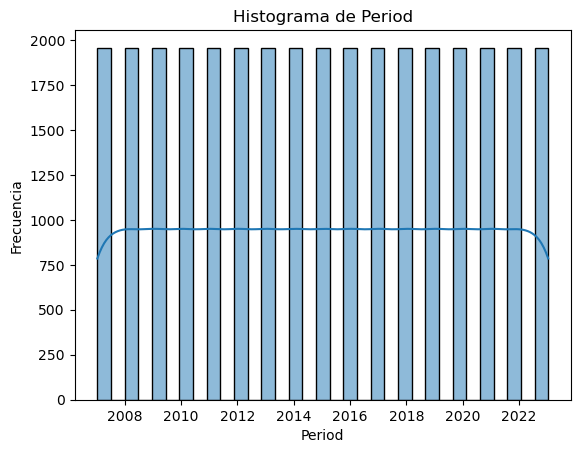

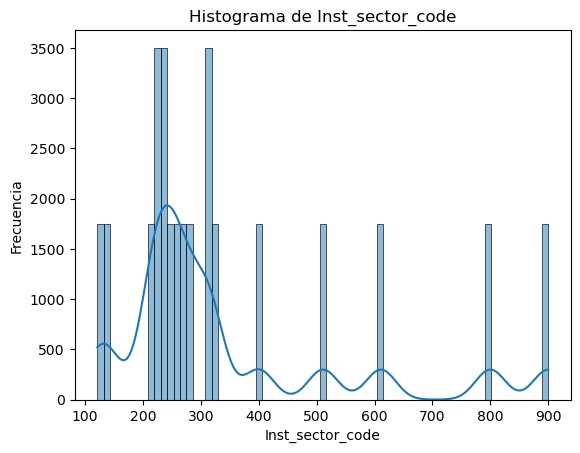

In [7]:
#Análisis Exploratorio de Datos (EDA)
#Distribuciones (Histogramas)
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


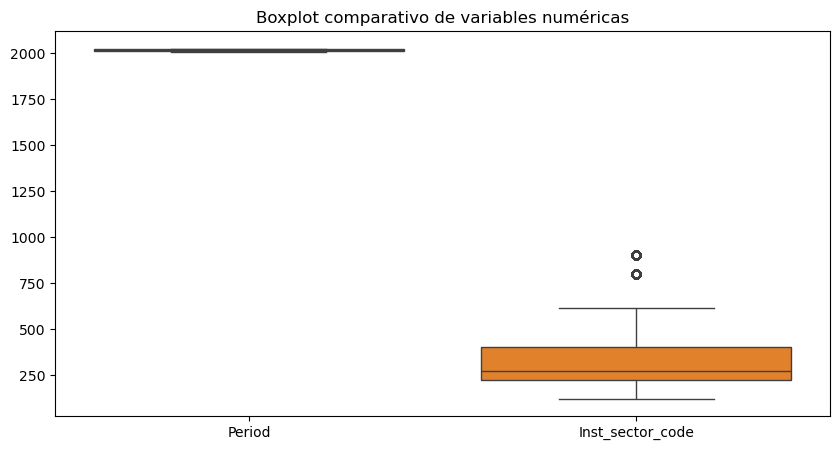

In [8]:
#Boxplot comparativo
plt.figure(figsize=(10,5))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot comparativo de variables numéricas")
plt.show()


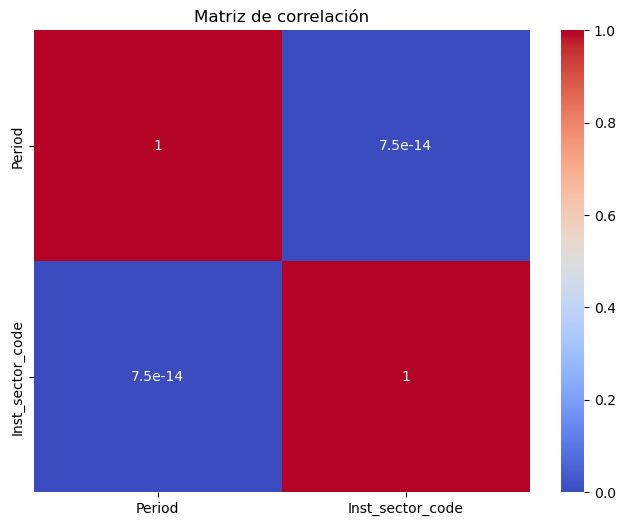

In [9]:
#Matriz de correlación
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title("Matriz de correlación")
    plt.show()


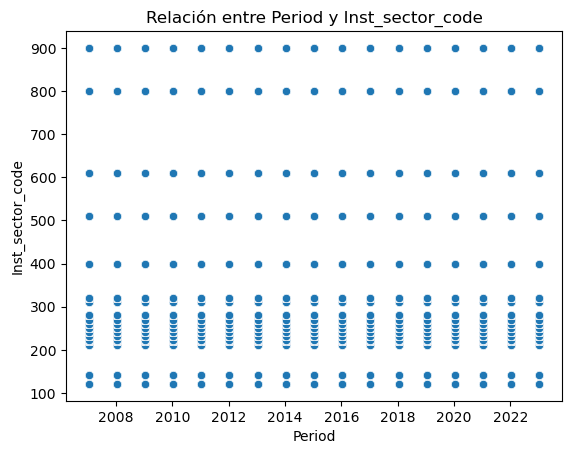

In [10]:
#Sctterplot entre dos variables
if len(num_cols) >= 2:
    plt.figure()
    sns.scatterplot(x=df[num_cols[0]], y=df[num_cols[1]])
    plt.title(f"Relación entre {num_cols[0]} y {num_cols[1]}")
    plt.xlabel(num_cols[0])
    plt.ylabel(num_cols[1])
    plt.show()


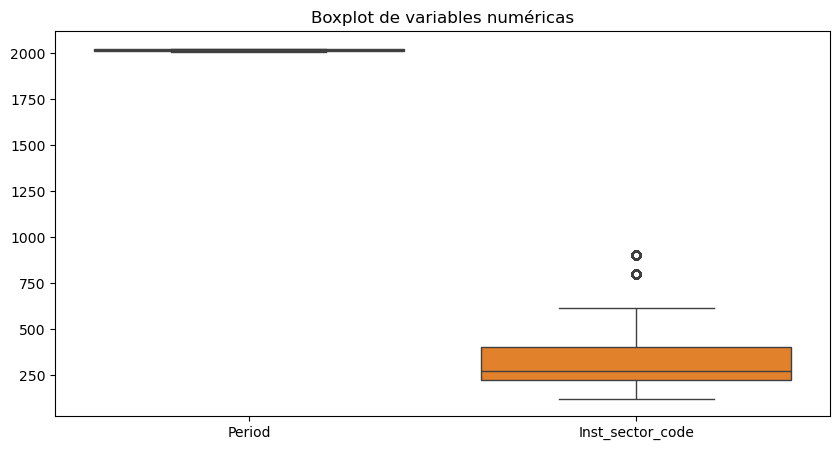

In [12]:
#Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot de variables numéricas")
plt.show()


# 4)Conclusiones

1) El dataset fue limpiado correctamente, imputando valores faltantes y removiendo duplicados.

2) Se verificó la correcta estructura de tipos de datos y se corrigió la columna de año.

3) El análisis exploratorio revela patrones, correlaciones y valores extremos útiles para etapas posteriores.

4) La normalización permite preparar los datos para algoritmos de machine learning sensibles a la escala.

## 5. CONSULTA BIBLIOGRÁFICA – GRÁFICAS EN CIENCIA DE DATOS

# 10 GRÁFICAS MÁS UTILIZADAS EN CIENCIA DE DATOS

# 1. Histograma
 - Qué representa: distribución de frecuencias de una variable numérica.
 - Para qué se utiliza: identificar forma de la distribución (normal, sesgada), rangos y outliers.
 - Ejemplo: edades que muestran si la población es joven o adulta.

# 2. Boxplot
 - Qué representa: mediana, cuartiles y valores atípicos.
 - Para qué se utiliza: comparar distribuciones y detectar outliers.
 - Ejemplo: salarios con presencia de sueldos extremadamente altos.

# 3. Scatterplot
 - Qué representa: relación entre dos variables numéricas.
 - Para qué se utiliza: ver correlaciones o tendencias lineales.
 - Ejemplo: peso vs. estatura mostrando correlación positiva.

# 4. Heatmap de correlación
 - Qué representa: matriz de correlaciones en forma de colores.
 - Para qué se utiliza: identificar relaciones fuertes entre variables.
 - Ejemplo: correlación 0.95 entre consumo y kilómetros.

# 5. Pairplot
 - Qué representa: múltiples scatterplots y distribuciones.
 - Para qué se utiliza: análisis multivariado rápido.
 - Ejemplo: dataset de flores mostrando cómo se separan especies.

# 6. Violin Plot
 - Qué representa: distribución y densidad de una variable.
 - Para qué se utiliza: comparar grupos con más detalle que boxplot.
 - Ejemplo: comparar distribución de puntajes entre dos grupos.

# 7. Gráfico de líneas
 - Qué representa: evolución temporal de una variable.
 - Para qué se utiliza: analizar tendencias en series de tiempo.
 - Ejemplo: ventas mensuales de un producto.

# 8. Gráfico de barras
 - Qué representa: comparación entre categorías.
 - Para qué se utiliza: ver diferencias entre grupos.
 - Ejemplo: ventas por tipo de producto.

# 9. Pie Chart
 - Qué representa: proporciones de un total.
 - Para qué se utiliza: ver participación porcentual.
 - Ejemplo: market share de empresas.

# 10. KDE Plot
 - Qué representa: densidad suave de una variable numérica.
 - Para qué se utiliza: ver forma de distribución sin histogramas.
 - Ejemplo: densidad de ingresos para ver concentración por rangos.



# FUENTES RECOMENDADAS
- Maldonado, S., & Vairetti, C. (Año). Título del libro de Ciencia de Datos. Editorial.
- Ríos Insua, D. (Año). Introducción a la Ciencia de Datos. Editorial.
- Pérez, F. (Año). Data Science en R. Editorial.
- Contreras, J. (Año). Título relacionado con análisis de datos. Editorial.
- Joyanes, L. (Año). Big Data y Ciencia de Datos. Editorial.
